In [19]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [20]:
# Read in dataset
df = pd.read_csv("https://raw.githubusercontent.com/JosephLazarus/QTW/main/Case%20Study%202/Data/mapped_diabetes.csv")
df.head()

/var/folders/vz/68jlc85d78vcqcr5gx1r56l40000gn/T/ipykernel_4148/2034539763.py:2: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("https://raw.githubusercontent.com/JosephLazarus/QTW/main/Case%20Study%202/Data/mapped_diabetes.csv")


,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted,was_readmitted
0,2278392,8222157,Caucasian,Female,[0-10),NaN,Trauma Center,Unknown/Invalid,Physician Referral,1,...,No,No,No,No,No,No,No,No,NO,0
1,149190,55629189,Caucasian,Female,[10-20),NaN,Urgent,Discharged/transferred to another short term h...,Emergency Room,3,...,Up,No,No,No,No,No,Ch,Yes,>30,0
2,64410,86047875,AfricanAmerican,Female,[20-30),NaN,Urgent,Discharged/transferred to another short term h...,Emergency Room,2,...,No,No,No,No,No,No,No,Yes,NO,0
3,500364,82442376,Caucasian,Male,[30-40),NaN,Urgent,Discharged/transferred to another short term h...,Emergency Room,2,...,Up,No,No,No,No,No,Ch,Yes,NO,0
4,16680,42519267,Caucasian,Male,[40-50),NaN,Urgent,Discharged/transferred to another short term h...,Emergency Room,1,...,Steady,No,No,No,No,No,Ch,Yes,NO,0


In [21]:
df.shape

(101766, 51)

In [22]:
# Replace '?' with Nan
df = df.replace(['?',' Not Mapped', ' Not Available', 'Not Mapped', 'Not Available'], np.NAN)

# Count missing values
df_na = pd.DataFrame(df.isna().sum())
df_na.rename(columns={df_na.columns[0]: 'count'}, inplace = True)

df_na = df_na[df_na['count'] != 0]
df_na['percent_missing'] = df_na['count']/df.shape[0]
df_na = df_na.sort_values('count', ascending=False)

df_na

,count,percent_missing
weight,98569,0.968585
medical_specialty,49949,0.490822
payer_code,40256,0.395574
admission_source_id,7067,0.069444
admission_type_id,5136,0.050469
race,2273,0.022336
diag_3,1423,0.013983
diag_2,358,0.003518
discharge_disposition_id,62,0.000609
diag_1,21,0.000206


In [23]:
print(df['admission_source_id'].value_counts())

 Emergency Room                                               57494
 Physician Referral                                           29565
Transfer from a hospital                                       3187
 Transfer from another health care facility                    2264
Clinic Referral                                                1104
 Transfer from a Skilled Nursing Facility (SNF)                 855
HMO Referral                                                    187
 Court/Law Enforcement                                           16
 Transfer from hospital inpt/same fac reslt in a sep claim       12
 Transfer from critial access hospital                            8
 Extramural Birth                                                 2
Normal Delivery                                                   2
 Transfer from Ambulatory Surgery Center                          2
 Sick Baby                                                        1
Name: admission_source_id, dtype: int64


In [24]:
print(df['admission_type_id'].value_counts())

Urgent           53990
Newborn          18869
Elective         18480
Trauma Center     5291
Name: admission_type_id, dtype: int64


In [25]:
print(df['discharge_disposition_id'].value_counts())

Discharged/transferred to another short term hospital                                                        60234
Discharged/transferred to ICF                                                                                13954
Left AMA                                                                                                     12902
Expired at home. Medicaid only, hospice.                                                                      3691
Discharged/transferred to SNF                                                                                 2128
Discharged/transferred to a long term care hospital.                                                          1993
Still patient or expected to return for outpatient services                                                   1642
Discharged/transferred to home with home health service                                                       1184
Unknown/Invalid                                                                 

In [26]:
df_impute = df

# drop weight
df_impute.drop(columns=['weight'], axis=1, inplace=True)

# fill NA - medical_specialty, payer_code, race, 
df_impute.medical_specialty = df_impute.medical_specialty.fillna('NA')
df_impute.payer_code = df_impute.payer_code.fillna('NA')
df_impute.admission_source_id = df_impute.admission_source_id.fillna('NA')
df_impute.admission_type_id = df_impute.admission_type_id.fillna('NA')
df_impute.race = df_impute.race.fillna('NA')
df_impute.discharge_disposition_id = df_impute.discharge_disposition_id.fillna('Unknown/Invalid')
df_impute.diag_1 = df_impute.diag_1.fillna('NA')
df_impute.diag_2 = df_impute.diag_2.fillna('NA')
df_impute.diag_3 = df_impute.diag_3.fillna('NA')


In [27]:
df_impute.head(5)

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,...,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted,was_readmitted
0,2278392,8222157,Caucasian,Female,[0-10),Trauma Center,Unknown/Invalid,Physician Referral,1,NA,...,No,No,No,No,No,No,No,No,NO,0
1,149190,55629189,Caucasian,Female,[10-20),Urgent,Discharged/transferred to another short term h...,Emergency Room,3,NA,...,Up,No,No,No,No,No,Ch,Yes,>30,0
2,64410,86047875,AfricanAmerican,Female,[20-30),Urgent,Discharged/transferred to another short term h...,Emergency Room,2,NA,...,No,No,No,No,No,No,No,Yes,NO,0
3,500364,82442376,Caucasian,Male,[30-40),Urgent,Discharged/transferred to another short term h...,Emergency Room,2,NA,...,Up,No,No,No,No,No,Ch,Yes,NO,0
4,16680,42519267,Caucasian,Male,[40-50),Urgent,Discharged/transferred to another short term h...,Emergency Room,1,NA,...,Steady,No,No,No,No,No,Ch,Yes,NO,0


# Model Preperations

### Target Variable - **readmitted**

There are 3 unique values in the **readmitted** target variable as shown below:

Our objective is to predict if a patient will re-admit at the hospital within 30 days of the initial admitted. Let's change all values with '<30' to 1 for possitive case of re-admit and 0 for others values for negative case of re-admit.

In [28]:
df_model = df_impute

print(df_model["readmitted"].value_counts())
print(df_model["was_readmitted"].value_counts())


NO     54864
>30    35545
<30    11357
Name: readmitted, dtype: int64
0    90409
1    11357
Name: was_readmitted, dtype: int64


### Categorical Variables

Let's look at our categorical variables again to see if some variables needed to be adjust before applying one-hot-coding.

In [29]:
df_object = df_model.select_dtypes(include=['object_'])
df_object.describe().transpose()

,count,unique,top,freq
race,101766,6,Caucasian,76099
gender,101766,3,Female,54708
age,101766,10,[70-80),26068
admission_type_id,101766,5,Urgent,53990
discharge_disposition_id,101766,24,Discharged/transferred to another short term h...,60234
admission_source_id,101766,15,Emergency Room,57494
payer_code,101766,18,NA,40256
medical_specialty,101766,73,NA,49949
diag_1,101766,717,428,6862
diag_2,101766,749,276,6752


**medical_specialty, diag_1, diag_1, and diag_3** has 73, 717, 749, and 790 unique values, respectively. These will be complicated for Logistic Regression model that the team planned to use for this prediction.

Therefore, to reduce the complication of one-hot-coding, we groupped the values in each column that appear <1% of the dataset (1,018 records) as 'Others'. 

In [30]:
def major(cols):
    x = df_model.groupby(by=cols, as_index=False).agg({'encounter_id': pd.Series.nunique})
    x.rename(columns={x.columns[0]: 'val', x.columns[1]: 'count'}, inplace = True)
    x['percent_appears'] = x['count']/df_model.shape[0]
    x = x[x['percent_appears'] > .01]
    row_to_list = x['val'].to_list()
    return row_to_list

medical_specialty_major = major(df_model['medical_specialty'])
df_model['medical_specialty_reduced'] = np.where(~df_model['medical_specialty'].isin(medical_specialty_major), "Others", df_model['medical_specialty'])
df_model.drop(columns=['medical_specialty'], axis=1, inplace=True)

diag1_major = major(df_model['diag_1'])
df_model['diag_1_reduced'] = np.where(~df_model['diag_1'].isin(diag1_major), "Others", df_model['diag_1'])
df_model.drop(columns=['diag_1'], axis=1, inplace=True)

diag2_major = major(df_model['diag_2'])
df_model['diag_2_reduced'] = np.where(~df_model['diag_2'].isin(diag2_major), "Others", df_model['diag_2'])
df_model.drop(columns=['diag_2'], axis=1, inplace=True)

diag3_major = major(df_model['diag_3'])
df_model['diag_3_reduced'] = np.where(~df_model['diag_3'].isin(diag3_major), "Others", df_model['diag_3'])
df_model.drop(columns=['diag_3'], axis=1, inplace=True)

In [31]:
# drop readmitted
df_model.drop(columns=['readmitted', 'encounter_id', 'patient_nbr'], axis=1, inplace=True)

In [32]:
df_model.head()

,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,num_lab_procedures,num_procedures,...,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,was_readmitted,medical_specialty_reduced,diag_1_reduced,diag_2_reduced,diag_3_reduced
0,Caucasian,Female,[0-10),Trauma Center,Unknown/Invalid,Physician Referral,1,NA,41,0,...,No,No,No,No,No,0,Others,Others,Others,NA
1,Caucasian,Female,[10-20),Urgent,Discharged/transferred to another short term h...,Emergency Room,3,NA,59,0,...,No,No,No,Ch,Yes,0,NA,276,250.01,Others
2,AfricanAmerican,Female,[20-30),Urgent,Discharged/transferred to another short term h...,Emergency Room,2,NA,11,5,...,No,No,No,No,Yes,0,NA,Others,250,Others
3,Caucasian,Male,[30-40),Urgent,Discharged/transferred to another short term h...,Emergency Room,2,NA,44,1,...,No,No,No,Ch,Yes,0,NA,Others,Others,403
4,Caucasian,Male,[40-50),Urgent,Discharged/transferred to another short term h...,Emergency Room,1,NA,51,0,...,No,No,No,Ch,Yes,0,NA,Others,Others,250


## One-hot Encode
One-hot encode categorical variables then drop originals.

In [33]:
df_object = df_model.select_dtypes(include=['object_'])

Categoricals_to_convert = list(df_object)

# using pd get dummies for the category columns we are keeping
dummies = pd.get_dummies(df_model[Categoricals_to_convert],drop_first=True)

#dropping original columns
df_model = df_model.drop(Categoricals_to_convert,axis=1)

#concating dummies to the data frame
df_model = pd.concat([df_model,dummies],axis=1)

df_model.head()

,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,was_readmitted,race_Asian,...,diag_3_reduced_427,diag_3_reduced_428,diag_3_reduced_496,diag_3_reduced_585,diag_3_reduced_599,diag_3_reduced_707,diag_3_reduced_780,diag_3_reduced_NA,diag_3_reduced_Others,diag_3_reduced_V45
0,1,41,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
1,3,59,0,18,0,0,0,9,0,0,...,0,0,0,0,0,0,0,0,1,0
2,2,11,5,13,2,0,1,6,0,0,...,0,0,0,0,0,0,0,0,1,0
3,2,44,1,16,0,0,0,7,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,51,0,8,0,0,0,5,0,0,...,0,0,0,0,0,0,0,0,0,0


# Model

In [34]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.1, random_state=42)

for train_index, test_valid_index in split.split(df_model, df_model.was_readmitted):
    host_modeling = df_model.iloc[train_index]
    host_validation = df_model.iloc[test_valid_index]

In [35]:
print("Size of modeling set (to be CV split): ", host_modeling.shape)
print("Size of hold back validation set: ", host_validation.shape)

Size of modeling set (to be CV split):  (91589, 216)
Size of hold back validation set:  (10177, 216)


In [36]:
# host_modeling.to_csv('df_modeling.csv', sep=',', encoding='utf-8')
# host_validation.to_csv('df_validation.csv', sep=',', encoding='utf-8')

In [37]:
#Create new X predictor matrix
X_host = host_modeling.drop(['was_readmitted'],axis=1).values #droping target
y_host = host_modeling['was_readmitted'].values
y_host = y_host.astype(int)

#Scale new predictor matrix
from sklearn.preprocessing import StandardScaler
scl_obj = StandardScaler()
scl_obj.fit(X_host)
X_host = scl_obj.transform(X_host)

In [38]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import StratifiedKFold


num_cv_iterations = 5
cv_object = StratifiedKFold(n_splits=num_cv_iterations, shuffle=True, random_state=27)

In [39]:
#Create new X predictor matrix
X_host_validate = host_validation.drop(['was_readmitted'],axis=1).values #droping target
y_host_validate = host_validation['was_readmitted'].values
y_host_validate = y_host_validate.astype(int)

#Scale new predictor matrix
from sklearn.preprocessing import StandardScaler
scl_obj = StandardScaler()
scl_obj.fit(X_host_validate)
X_host_validate = scl_obj.transform(X_host_validate)

In [40]:
from sklearn.metrics import make_scorer
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

scorer = {
    'accuracy': make_scorer(accuracy_score),
    'precision': make_scorer(precision_score, average='macro'),
    'recall': make_scorer(recall_score, average='macro'), 
    'F1': make_scorer(f1_score, average='macro')
}

In [41]:
import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_validate

#lr does not have weights applied
# lr = LogisticRegression(penalty='l1', C=1, class_weight=None, solver='saga', max_iter=100) # get object
lr = LogisticRegression(penalty='elasticnet', C=1, l1_ratio=0.01, class_weight='balanced', solver='saga', max_iter=100, multi_class='ovr')

cv_results = sklearn.model_selection.cross_validate(lr, X_host, y_host, cv=cv_object, scoring=scorer, error_score="raise")

print("Mean Accuracy = ",cv_results['test_accuracy'].mean())
print("Mean Precision = ",cv_results['test_precision'].mean())
print("Mean Recall = ",cv_results['test_recall'].mean())
print("Mean F1 = ",cv_results['test_F1'].mean())


/Users/puri/opt/anaconda3/envs/pyri/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/puri/opt/anaconda3/envs/pyri/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/puri/opt/anaconda3/envs/pyri/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/puri/opt/anaconda3/envs/pyri/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Mean Accuracy =  0.6632892217950325
Mean Precision =  0.5525969917867501
Mean Recall =  0.6209223346935966
Mean F1 =  0.5269389751948232


/Users/puri/opt/anaconda3/envs/pyri/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [ ]:
# from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV

# import sklearn
# from sklearn.linear_model import LogisticRegression
# from sklearn.model_selection import cross_validate

# parameters = {
#                 'penalty': ['l1', 'l2', 'elasticnet', 'none'], 
#                 'C': [1, 5, 10],
#                 'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
#                 'class_weight': [None, 'balanced'],
#                 'l1_ratio': [0.01, 0.1, 0.2, 0.5]
#              }


# clf = LogisticRegression()

# import warnings

# with warnings.catch_warnings():
#    warnings.simplefilter('ignore')
#    grid_obj = RandomizedSearchCV(clf, parameters, n_iter = 5, cv = cv_object, verbose=2, random_state=42, n_jobs = -1, scoring='roc_auc')
#    grid_obj = grid_obj.fit(X_host, y_host)

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV

parameters = {
                'penalty': ['l1', 'l2', 'elasticnet', 'none'], 
                'C': [1, 10, 20],
                'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
                'class_weight': [None, 'balanced'],
             }


clf = LogisticRegression()

import warnings

with warnings.catch_warnings():
   warnings.simplefilter('ignore')
   grid_obj = GridSearchCV(lr, parameters, cv=cv_object, scoring='roc_auc')
   grid_obj = grid_obj.fit(X_host, y_host)

In [ ]:
print(grid_obj.best_estimator_.get_params())

print('Model accuracy is',grid_obj.score(X_host, y_host))

In [ ]:
#lr does not have weights applied
lr_gridsearch = LogisticRegression(penalty='elasticnet', C=10, l1_ratio=0.01, class_weight='balanced', solver='saga', max_iter=100, multi_class='auto') # get object

cv_results = sklearn.model_selection.cross_validate(lr_gridsearch, X_host, y_host, cv=cv_object, scoring=scorer, error_score="raise") #lr does not have weights applied

print("Mean Accuracy = ",cv_results['test_accuracy'].mean())
print("Mean Precision = ",cv_results['test_precision'].mean())
print("Mean Recall = ",cv_results['test_recall'].mean())
print("Mean F1 = ",cv_results['test_F1'].mean())

## Make predictions on hold back validation set to compare metrics to the CV model

In [ ]:
cv_results = sklearn.model_selection.cross_validate(lr, X_host, y_host, cv=cv_object, scoring=scorer, error_score="raise") #lr does not have weights applied

print("Mean Accuracy = ",cv_results['test_accuracy'].mean())
print("Mean Precision = ",cv_results['test_precision'].mean())
print("Mean Recall = ",cv_results['test_recall'].mean())
print("Mean F1 = ",cv_results['test_F1'].mean())


In [42]:
lr_model_fit = lr.fit(X_host,y_host)
lr_validation_predictions = lr.predict(X_host_validate)

#print(lr_validation_predictions)
from sklearn.metrics import accuracy_score
print("Validation Set Accuracy: ", accuracy_score(y_host_validate, lr_validation_predictions))

Validation Set Accuracy:  0.6685663751596738


/Users/puri/opt/anaconda3/envs/pyri/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


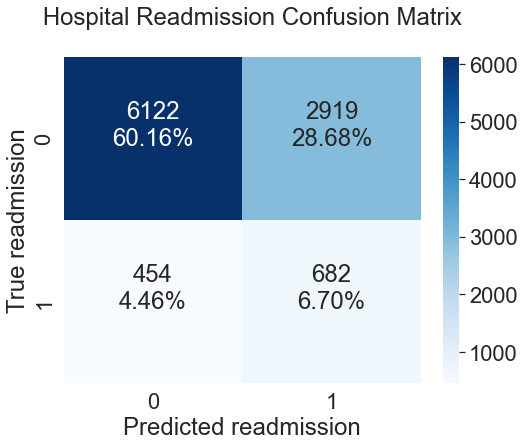

In [43]:
from sklearn.metrics import confusion_matrix

def plot_confusion(cf_matrix):
    plt.figure(figsize=(8, 6))
    sns.set(font_scale=2)
    group_names = ['True Neg','False Pos','False Neg','True Pos']
    group_counts = ['{0:0.0f}'.format(value) for value in
    cf_matrix.flatten()]
    group_percentages = ['{0:.2%}'.format(value) for value in
    cf_matrix.flatten()/np.sum(cf_matrix)]
    labels = [f'{v1}\n{v2}\n' for v1, v2 in
    zip(group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    # x_axis_labels = ['<30', '>30']
    # y_axis_labels = ['<30', '>30']
    ax = plt.axes()
    # sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues',xticklabels=x_axis_labels, yticklabels=y_axis_labels)
    sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')
    ax.set_title('   Hospital Readmission Confusion Matrix\n')
    plt.xlabel("Predicted readmission")
    plt.ylabel("True readmission") 


lr_cm = confusion_matrix(y_host_validate,lr_validation_predictions)
plot_confusion(lr_cm)

0.6907248434751858


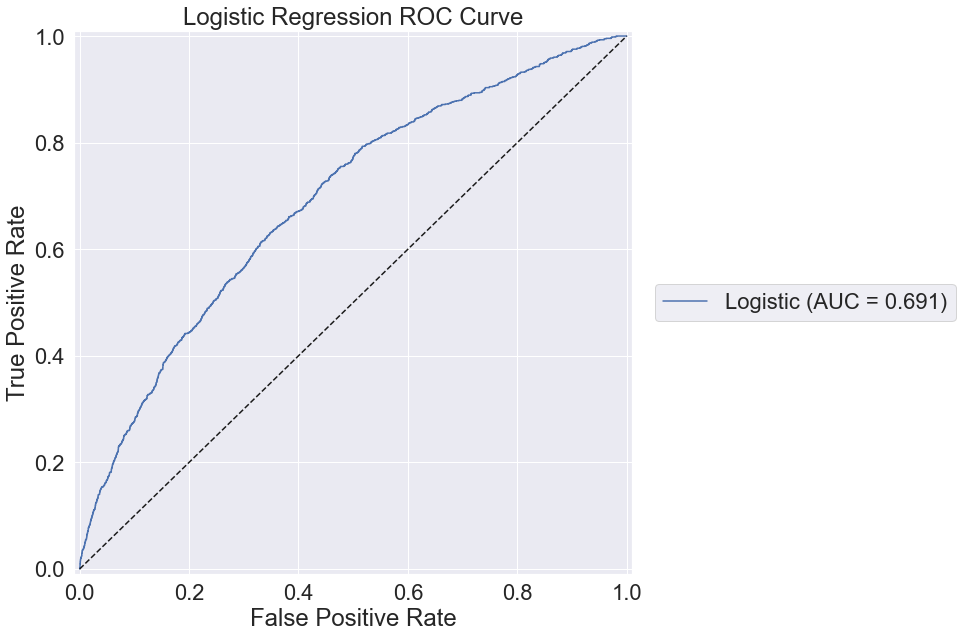

In [44]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

#Calculate probabilities on predictions (not just classifications) needed for AUC
lr_probabilities = lr.predict_proba(X_host_validate)


lr_fpr, lr_tpr, lr_thresholds = roc_curve(y_host_validate, lr_probabilities[:,1])
lr_auc = roc_auc_score(y_host_validate, lr_probabilities[:,1])

print(lr_auc)

# Plot ROC curve
plt.rcParams["figure.figsize"] = (10,10)
plt.plot(lr_fpr, lr_tpr, label='Logistic (AUC = %0.3f)' % lr_auc)
plt.plot([0, 1], [0, 1], 'k--')  # random predictions curve
plt.xlim([-0.01, 1.01])
plt.ylim([-0.01, 1.01])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression ROC Curve')
plt.legend(bbox_to_anchor=(1.04,0.5), loc="center left", borderaxespad=0)

### Logistic Regression Feature Importance

In [45]:
host_validation.head()

,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,was_readmitted,race_Asian,...,diag_3_reduced_427,diag_3_reduced_428,diag_3_reduced_496,diag_3_reduced_585,diag_3_reduced_599,diag_3_reduced_707,diag_3_reduced_780,diag_3_reduced_NA,diag_3_reduced_Others,diag_3_reduced_V45
54541,2,1,0,4,0,1,0,9,0,0,...,0,0,0,0,0,0,0,0,1,0
37176,14,39,5,36,0,0,1,8,0,0,...,0,0,0,0,0,0,0,0,1,0
24124,2,24,0,12,0,0,1,6,0,0,...,0,0,0,0,0,0,0,0,0,1
3618,3,12,0,8,0,0,1,3,0,0,...,0,0,0,0,0,0,0,0,0,0
56575,4,39,1,13,0,0,0,9,0,0,...,0,1,0,0,0,0,0,0,0,0


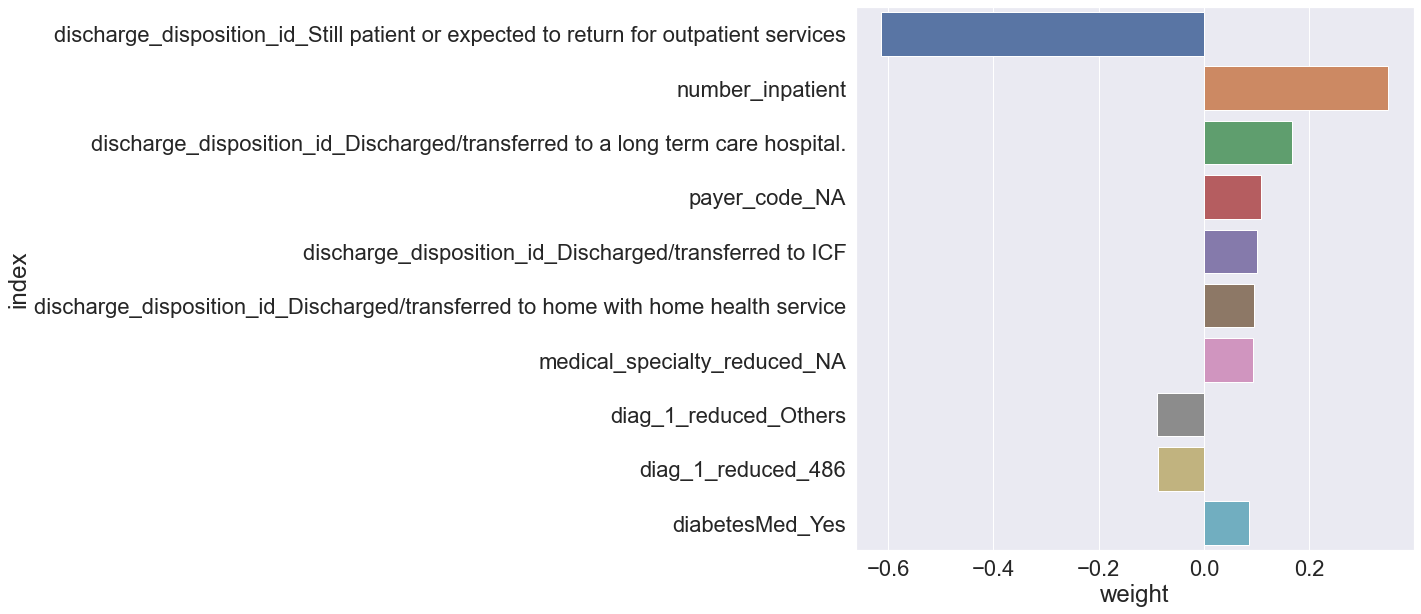

In [48]:

weights = lr_model_fit.coef_.T # take transpose to make a column vector
variable_names = host_validation.drop(['was_readmitted'],axis=1).columns 

coefficients = pd.DataFrame(weights,variable_names)
coefficients = coefficients.rename(columns={coefficients.columns[0]: 'weight'})
coefficients = coefficients.sort_values(by='weight', key=abs, ascending=False)
coefficients.reset_index(level=0, inplace=True)

ax = sns.barplot(y="index", x="weight", data=coefficients.head(10))